## About

In this notebook we prepare a simple solution for the [kaggle challenge on higgs.](https://inclass.kaggle.com/c/mlhep-2016-higgs-detection)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import pandas
import numpy

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

### Download data

In [3]:
!cd datasets; wget -O public_train_10000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_10000.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_train_10000.root' already there; not retrieving.


In [4]:
# you can download training sample with 100000 available events
# uncomment the below row
# !cd datasets; wget -O public_train_100000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_100000.root

In [5]:
!cd datasets; wget -O public_test.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_test.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_test.root' already there; not retrieving.


### Read the smallest part of training file and test file

In [91]:
import root_numpy
data = pandas.DataFrame(root_numpy.root2array('datasets/public_train_10000.root'))
data['delta_m_jj'] = abs(data.m_jj-data['m_jj'].mean())
data['delta_m_jjj'] = abs(data.m_jjj-data['m_jjj'].mean())
data['delta_m_jlv'] = abs(data.m_jlv-data['m_jlv'].mean())
data['delta_m_wwbb'] = abs(data.m_wwbb-data['m_wwbb'].mean())
data['delta_m_bb'] = abs(data.m_bb-data['m_bb'].mean())
data['delta_m_wbb'] = abs(data.m_wbb-data['m_wbb'].mean())
test = pandas.DataFrame(root_numpy.root2array('datasets/public_test.root'))
test['delta_m_jj'] = abs(data.m_jj-data['m_jj'].mean())
test['delta_m_jjj'] = abs(data.m_jjj-data['m_jjj'].mean())
test['delta_m_jlv'] = abs(data.m_jlv-data['m_jlv'].mean())
test['delta_m_wwbb'] = abs(data.m_wwbb-data['m_wwbb'].mean())
test['delta_m_bb'] = abs(data.m_bb-data['m_bb'].mean())
test['delta_m_wbb'] = abs(data.m_wbb-data['m_wbb'].mean())

In [92]:
data.head()

,event_id,target,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,...,m_jlv,m_bb,m_wbb,m_wwbb,delta_m_jj,delta_m_jjj,delta_m_jlv,delta_m_wwbb,delta_m_bb,delta_m_wbb
0,1000001,1,34.750568,0.787025,1.898891,20.862434,-2.622998,44.814148,-0.168171,2.631595,...,170.086075,91.128204,298.468781,374.685760,8.063087,7.935013,22.929352,109.426941,29.090973,49.811584
1,1000002,1,54.250927,-1.057915,2.310697,51.167873,2.545749,31.039040,-2.220276,-0.737298,...,208.039688,67.118484,287.363983,527.247559,23.949791,19.448624,15.024261,43.134857,53.100693,60.916382
2,1000003,1,47.746025,-0.783184,2.660325,68.165527,-1.700790,36.945312,-1.151738,-0.626912,...,149.089005,130.389206,237.879318,336.058838,20.470612,25.313400,43.926422,148.053864,10.170029,110.401047
3,1000004,0,45.950066,1.613817,0.964722,39.302082,-0.075989,84.307426,0.465748,2.287783,...,164.411148,93.709511,237.900055,392.807831,18.755470,0.693405,28.604279,91.304871,26.509666,110.380310
4,1000005,0,44.409187,-0.228907,-1.837974,49.886654,0.156533,32.852112,2.561646,2.641460,...,150.299744,69.818291,435.990356,533.977905,32.242638,106.945953,42.715683,49.865204,50.400887,87.709991


In [93]:
test.head()

,event_id,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,m_jlv,m_bb,m_wbb,m_wwbb,delta_m_jj,delta_m_jjj,delta_m_jlv,delta_m_wwbb,delta_m_bb,delta_m_wbb
0,1,58.814354,-1.223199,1.290717,26.435696,2.608772,68.413330,0.639561,-1.226549,1.000008,...,224.813538,95.737434,372.835388,469.654236,8.063087,7.935013,22.929352,109.426941,29.090973,49.811584
1,2,21.390781,-0.468277,-1.371404,57.185963,1.214130,118.127953,-0.113784,-2.182008,0.000000,...,211.729141,195.910385,310.480103,431.597137,23.949791,19.448624,15.024261,43.134857,53.100693,60.916382
2,3,58.570217,1.443092,0.105191,54.450954,-2.354347,26.443583,-1.911658,1.337635,0.000000,...,260.643646,351.328644,638.053040,790.960815,20.470612,25.313400,43.926422,148.053864,10.170029,110.401047
3,4,70.469345,0.166176,-1.962429,38.138966,2.564890,42.678413,-1.256608,-0.276156,2.000000,...,169.550491,96.056900,305.073212,402.656067,18.755470,0.693405,28.604279,91.304871,26.509666,110.380310
4,5,113.456779,0.232503,2.941150,64.401146,1.125812,164.289139,-0.735258,-0.590741,1.999937,...,187.637009,142.145920,433.032440,507.496399,32.242638,106.945953,42.715683,49.865204,50.400887,87.709991


### Define training features

Exclude `event_id`, `target` from the features set

In [94]:
features = list(set(data.columns) - {'event_id', 'target'})
features

['jet3_pt',
 'jet3_eta',
 'mem_pt',
 'm_jjj',
 'mem_phi',
 'jet1_pt',
 'jet4_phi',
 'delta_m_jj',
 'delta_m_wwbb',
 'jet1_phi',
 'jet2_eta',
 'jet3_btag',
 'm_jlv',
 'delta_m_bb',
 'm_wbb',
 'jet4_pt',
 'jet4_btag',
 'jet2_pt',
 'jet1_btag',
 'm_jj',
 'm_wwbb',
 'jet2_phi',
 'lepton_phi',
 'm_bb',
 'm_lv',
 'jet4_eta',
 'jet2_btag',
 'lepton_pt',
 'delta_m_jlv',
 'lepton_eta',
 'delta_m_wbb',
 'jet3_phi',
 'delta_m_jjj',
 'jet1_eta']

### Prepare high-level features for training

In [95]:
high_level_features = ['m_jj', 'm_jjj', 'm_jlv', 'm_wwbb', 'm_bb', 'm_wbb', 'm_lv', 'jet4_btag',
                      'delta_m_jj', 'delta_m_jjj', 'delta_m_jlv', 'delta_m_wwbb', 'delta_m_bb',
                        'delta_m_wbb']

### Plot histograms for each high-level feature

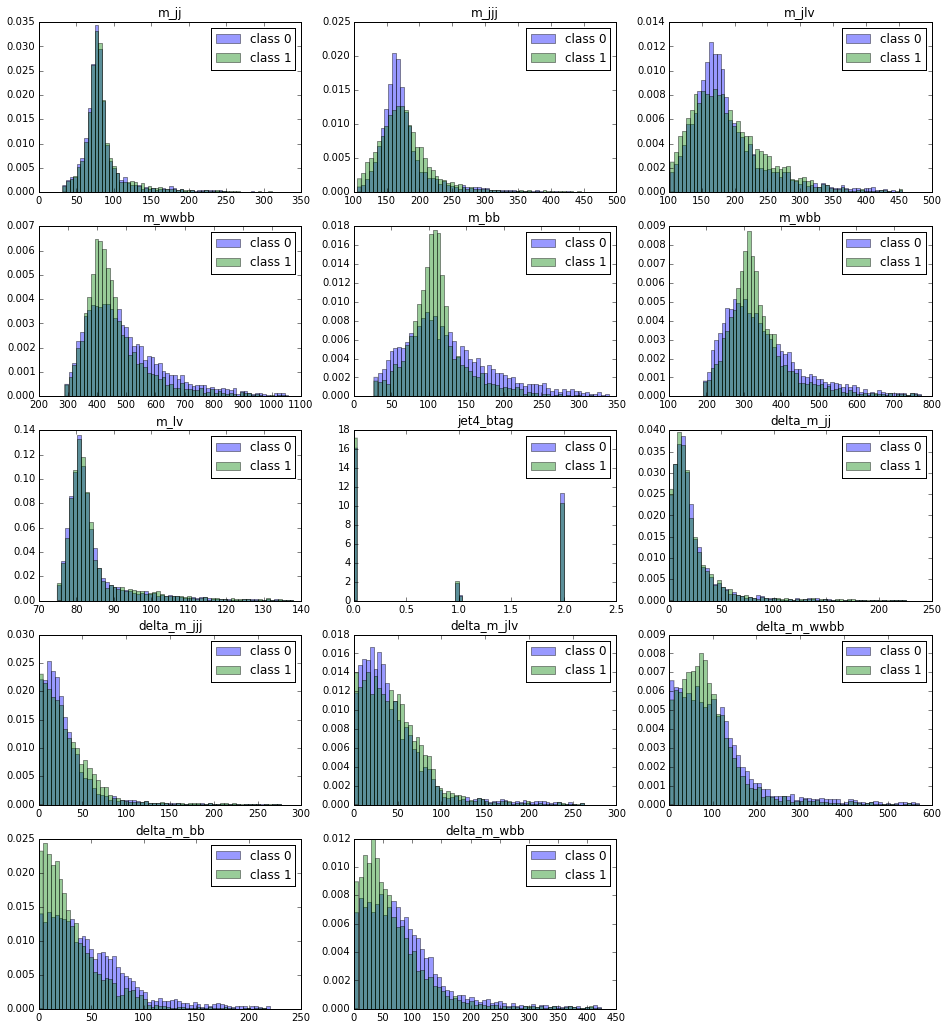

In [96]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(high_level_features):
    # add sub plot on our figure
    plt.subplot(len(features) // 5 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    plt.title(feature)

### Divide training data into 2 parts 
`train_test_split` function is used to divide into 2 parts to preserve quality overestimating.

In [97]:
training_data, validation_data = train_test_split(data, random_state=367, train_size=0.66)

### Simple knn from `sklearn` training

In [4]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=9)
#knn.fit(training_data[high_level_features], training_data.target)

import sklearn.feature_selection
#from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#knn = RandomForestClassifier(max_depth=13, n_estimators=35, max_features=3)

knn = Pipeline([
  ('feature_selection', sklearn.feature_selection.SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier(max_depth=13, n_estimators=35, max_features=3))
])

#from sklearn.ensemble import AdaBoostClassifier
#knn = AdaBoostClassifier(n_estimators = 20)

#from sklearn.ensemble import GradientBoostingClassifier
#knn = GradientBoostingClassifier(n_estimators = 250, max_depth=2)

#from sklearn.svm import SVC
#knn = SVC(gamma=0.00009, C=1, probability=True)

#from sklearn.kernel_ridge import KernelRidge
#knn = KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
#            kernel_params=None)

#from sklearn import linear_model
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.neural_network import BernoulliRBM
#from sklearn.pipeline import Pipeline
# Models we will use
#logistic = SVC(gamma=0.00009, C=1, probability=True)
#logistic = linear_model.LogisticRegression(C = 6000.0)
#logistic = AdaBoostClassifier(n_estimators = 20)
#rbm = BernoulliRBM(random_state=0, verbose=True, learning_rate=0.06, n_iter = 5, 
#                   n_components = 100)
#knn = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

#from sklearn.ensemble import GradientBoostingClassifier
#knn = GradientBoostingClassifier(max_depth=8, n_estimators=65, loss='exponential', 
#                                 max_features=6)

knn.fit(training_data[high_level_features], training_data.target)

AttributeError: 'module' object has no attribute 'SelectFromModel'

In [159]:
# predict validation sample (probability for each event)
proba = knn.predict_proba(validation_data[high_level_features])

In [160]:
proba

array([[ 0.50374127,  0.49625873],
       [ 0.5341183 ,  0.4658817 ],
       [ 0.72546706,  0.27453294],
       ..., 
       [ 0.35276983,  0.64723017],
       [ 0.28486514,  0.71513486],
       [ 0.68011905,  0.31988095]])

### Compute quality (ROC AUC) on the validation set (to prevent overestimating quality)

In [161]:
# take probability to be 1 class to compute ROC AUC
roc_auc_score(validation_data.target, proba[:, 1])

0.74835784030887686

## Prepare submission to kaggle

In [ ]:
# predict test sample
kaggle_proba = knn.predict_proba(test[high_level_features])[:, 1]
kaggle_ids = test.event_id

In [ ]:
from IPython.display import FileLink
def create_solution(ids, proba, filename='baseline.csv'):
    """saves predictions to file and provides a link for downloading """
    pandas.DataFrame({'event_id': ids, 'prediction': proba}).to_csv('datasets/{}'.format(filename), index=False)
    return FileLink('datasets/{}'.format(filename))
    
create_solution(kaggle_ids, kaggle_proba)

In [3]:
!pip install --upgrade sklearn

    100% |################################| 17.6MB 71kB/s 
  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /root/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn
  Found existing installation: scikit-learn 0.16.1
    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling scikit-learn-0.16.1:
      Successfully uninstalled scikit-learn-0.16.1
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


SyntaxError: invalid syntax (<ipython-input-6-497d29a66c43>, line 1)